In [3]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
ts = 'TIME_SERIES_INTRADAY'#'TIME_SERIES_DAILY'
interval = '1min'
api_key = '' 
outputsize = 'full' # compact=100 results, full= all data (5 days?)
def getIntraday1minDF(symbol): 
    link = 'https://www.alphavantage.co/query?function={}&symbol={}&interval={}&apikey={}&outputsize={}'\
        .format(ts, symbol, interval, api_key, outputsize)
    request = requests.get(link)
    data = json.loads(request.text)
    stock_data = json.dumps(data["Time Series (1min)"])
    df = pd.read_json(stock_data).transpose()
    cols = ['1. open', '2. high', '3. low', '4. close', '5. volume']
    df = df[cols]
    df.reset_index(level=0, inplace=True)
    df.columns = ['times', 'open', 'high', 'low', 'close', 'volume']
    return df

In [4]:
worldTradingData_APIKey = ''
def getWorldTradingData_Intraday1min(symbol, days=1, interval=1) :
    # limits on the inputs https://www.worldtradingdata.com/documentation#stock-and-index-intraday
    link = "https://intraday.worldtradingdata.com/api/v1/intraday?symbol={}&range={}&interval={}&api_token={}"\
        .format(symbol, days, interval, worldTradingData_APIKey)
    request = requests.get(link)
    data = json.loads(request.text)
    stock_data = json.dumps(data["intraday"])
    df = pd.read_json(stock_data).transpose()
    cols = ['open', 'high', 'low', 'close', 'volume']
    df = df[cols]
    df.reset_index(level=0, inplace=True)
    df.columns = ['times', 'open', 'high', 'low', 'close', 'volume']
    return df
    
    

In [5]:
TSLA_world = getWorldTradingData_Intraday1min("TSLA", days=7)

In [6]:
len(TSLA_world)

2726

In [8]:
TSLA_world.head(10)

,times,open,high,low,close,volume
0,2019-11-15 15:59:00,352.24,352.30,351.67,352.24,69161.0
1,2019-11-15 15:58:00,352.20,352.32,352.07,352.23,48294.0
2,2019-11-15 15:57:00,352.07,352.24,352.06,352.24,24071.0
3,2019-11-15 15:56:00,352.19,352.27,352.00,352.11,38449.0
4,2019-11-15 15:55:00,352.13,352.22,352.08,352.20,20169.0
5,2019-11-15 15:54:00,352.20,352.20,352.00,352.13,14086.0
6,2019-11-15 15:53:00,352.10,352.19,352.00,352.19,18644.0
7,2019-11-15 15:52:00,352.25,352.40,352.06,352.07,41518.0
8,2019-11-15 15:51:00,352.31,352.36,352.15,352.22,27775.0
9,2019-11-15 15:50:00,352.47,352.50,352.31,352.31,20715.0


In [7]:
TSLA_world.tail()

,times,open,high,low,close,volume
2721,2019-11-07 09:34:00,329.25,329.25,329.16,329.16,70291.0
2722,2019-11-07 09:33:00,330.15,330.66,328.02,328.22,106696.0
2723,2019-11-07 09:32:00,330.46,330.99,330.00,330.01,96695.0
2724,2019-11-07 09:31:00,328.85,330.60,328.44,330.60,201490.0
2725,2019-11-07 09:30:00,329.14,329.37,328.83,328.83,339302.0


In [16]:
tsla_df = getIntraday1minDF("TSLA")
# msft_df = getIntraday1minDF("MSFT")

In [17]:
len(tsla_df)

1932

In [18]:
tsla_df.head(10)

,times,open,high,low,close,volume
0,2019-11-15 16:00:00,352.250,352.32,351.6900,352.240,68849.0
1,2019-11-15 15:59:00,352.200,352.32,352.0700,352.230,48294.0
2,2019-11-15 15:58:00,352.070,352.24,352.0600,352.240,24071.0
3,2019-11-15 15:57:00,352.190,352.27,352.0000,352.110,38449.0
4,2019-11-15 15:56:00,352.130,352.22,352.0800,352.195,20169.0
5,2019-11-15 15:55:00,352.200,352.20,352.0000,352.130,14086.0
6,2019-11-15 15:54:00,352.095,352.19,352.0000,352.190,18644.0
7,2019-11-15 15:53:00,352.250,352.40,352.0616,352.070,41518.0
8,2019-11-15 15:52:00,352.310,352.36,352.1500,352.220,27775.0
9,2019-11-15 15:51:00,352.470,352.50,352.3100,352.310,20715.0


In [19]:
tsla_df.tail()

,times,open,high,low,close,volume
1927,2019-11-11 09:35:00,344.6850,344.6850,344.6850,344.6850,100037.0
1928,2019-11-11 09:34:00,346.3225,346.6726,345.0549,345.1668,137126.0
1929,2019-11-11 09:33:00,345.6191,346.8858,345.4845,346.3591,139328.0
1930,2019-11-11 09:32:00,342.3100,345.7700,342.2200,345.4100,282506.0
1931,2019-11-11 09:31:00,343.7409,344.3275,342.3355,342.4209,458958.0


In [20]:
def plotOpenPrices(dataframe):
    open_prices = [close_stock for open_stock, close_stock in zip(dataframe['open'], dataframe['close'])]
    plt.plot(dataframe.index, open_prices)
    plt.xlim(len(dataframe.index)+10,0-10)
    plt.xlabel('Minutes before now (in 1 minute intervals)')
    plt.ylabel('Open price')
    plt.title('Market Price for the past in 1 min intervals')
    plt.show()
    
    

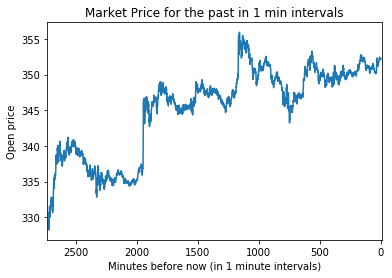

In [21]:
plotOpenPrices(TSLA_world)

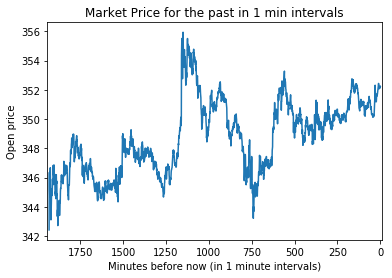

In [22]:
plotOpenPrices(tsla_df)